In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32


In [3]:
df.shape

(8535, 6)

In [4]:
df.isnull().sum()

tanggal                 135
wilayah                 135
waktu                   135
cuaca                   135
kelembaban_persen       135
suhu_derajat_celcius    135
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
dtype: int64

In [6]:
df.shape

(8400, 6)

In [7]:
df["cuaca"].unique()

array(['Hujan Lokal', 'Hujan Ringan', 'Berawan', 'Cerah Berawan', 'Cerah',
       'Berawan Tebal', 'Hujan Sedang', 'Cerah Berawn', 'Cerang Berawan',
       'Beawan', 'Berawan ', 'Hujan Petir', 'Hujan Lokal ',
       'Cerah Berawan ', 'Cerah ', 'Cerah Berawah', 'Cerah  ', ' Berawan',
       'Hujan', 'Hujan Petir ', 'Hujan Sedang ', 'Cerah berawan',
       'Hujan Ringanl', 'Berawa', 'Hujang Sedang', 'Hujan Loka',
       'Hujan Ringan '], dtype=object)

In [8]:
import re

def cuaca(x):
  if (re.findall("Cerah", x)):
    return 'Cerah'
  elif (re.findall("Hujan", x)):
    return 'Hujan'
  elif (re.findall("Berawan", x)):
    return 'Berawan'

df["cuaca"] = df['cuaca'].apply(cuaca)
df["cuaca"].value_counts()

Cerah      3796
Berawan    2896
Hujan      1706
Name: cuaca, dtype: int64

In [9]:
df.cuaca.isna().sum()

2

In [10]:
df.dropna(inplace=True)

In [11]:
import re

def waktu(x):
  if (re.findall("dini hari", x)):
    return 'Dini Hari'
  elif (re.findall("siang", x)):
    return 'Siang'
  elif (re.findall("pagi", x)):
    return 'Pagi'
  elif (re.findall("malam", x)):
    return 'Malam'
  else:
    return x

df["waktu"] = df['waktu'].apply(waktu)
df["waktu"].value_counts()

Siang        2100
Pagi         2100
Malam        2099
Dini Hari    2099
Name: waktu, dtype: int64

In [12]:
df["kelembaban_min"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[0])
df["kelembaban_min"] = [x.strip(' ') for x in df["kelembaban_min"]]

df["kelembaban_max"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[1])
df["kelembaban_max"] = [x.strip(' ') for x in df["kelembaban_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90


In [13]:
print('Kelembaban Min\n', df['kelembaban_min'].value_counts(), '\n\n')
print('Kelembaban Min\n', df['kelembaban_max'].value_counts(), '\n')

Kelembaban Min
 70    1727
55    1296
65    1272
60    1224
75     839
45     624
50     600
80     480
40     192
35      96
85      48
Name: kelembaban_min, dtype: int64 


Kelembaban Min
 95     3264
90     2375
85     1128
100    1031
80      504
75       96
Name: kelembaban_max, dtype: int64 



In [14]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]

df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


In [15]:
print('Suhu Min\n', df['suhu_min'].value_counts(), '\n')
print('Suhu Max\n', df['suhu_max'].value_counts(), '\n')

Suhu Min
 24    4102
23    3072
25     576
22     552
21      48
20      24
26      24
Name: suhu_min, dtype: int64 

Suhu Max
 33    3431
32    1991
34    1440
31     696
30     360
35     288
29     120
28      72
Name: suhu_max, dtype: int64 



In [16]:
df.dtypes

tanggal                 object
wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen       object
suhu_derajat_celcius    object
kelembaban_min          object
kelembaban_max          object
suhu_min                object
suhu_max                object
dtype: object

In [17]:
df["kelembaban_min"] = df.kelembaban_min.astype(int)
df["kelembaban_max"] = df.kelembaban_max.astype(int)
df["suhu_min"] = df.suhu_min.astype(int)
df["suhu_max"] = df.suhu_max.astype(int)
df.dtypes

tanggal                 object
wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen       object
suhu_derajat_celcius    object
kelembaban_min           int32
kelembaban_max           int32
suhu_min                 int32
suhu_max                 int32
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8398 entries, 0 to 8399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               8398 non-null   object
 1   wilayah               8398 non-null   object
 2   waktu                 8398 non-null   object
 3   cuaca                 8398 non-null   object
 4   kelembaban_persen     8398 non-null   object
 5   suhu_derajat_celcius  8398 non-null   object
 6   kelembaban_min        8398 non-null   int32 
 7   kelembaban_max        8398 non-null   int32 
 8   suhu_min              8398 non-null   int32 
 9   suhu_max              8398 non-null   int32 
dtypes: int32(4), object(6)
memory usage: 590.5+ KB


In [19]:
df.cuaca.value_counts()

Cerah      3796
Berawan    2896
Hujan      1706
Name: cuaca, dtype: int64

In [20]:
numeric = ['kelembaban_min', 'kelembaban_max', 'suhu_min', 'suhu_max', 'kelembaban_persen', 'suhu_derajat_celcius']
categoric = ['cuaca', 'waktu', 'wilayah', 'tanggal']

In [21]:
df[numeric].describe()

,kelembaban_min,kelembaban_max,suhu_min,suhu_max
count,8398.000000,8398.000000,8398.000000,8398.000000
mean,62.254704,91.727792,23.548464,32.608597
std,10.592668,5.562658,0.775947,1.246190
min,35.000000,75.000000,20.000000,28.000000
25%,55.000000,90.000000,23.000000,32.000000
50%,65.000000,95.000000,24.000000,33.000000
75%,70.000000,95.000000,24.000000,33.000000
max,85.000000,100.000000,26.000000,35.000000


In [22]:
df.skew()

C:\Users\TOKOFE~1\AppData\Local\Temp/ipykernel_11692/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


kelembaban_min   -0.307247
kelembaban_max   -0.636756
suhu_min         -0.492156
suhu_max         -0.886269
dtype: float64

In [23]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


In [24]:
df.drop(columns=['kelembaban_persen', 'suhu_derajat_celcius', 'tanggal'], inplace=True)

In [25]:
df.head()

,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,Hujan,70,90,24,32
1,Kepulauan Seribu,Pagi,Hujan,70,90,24,32
2,Kepulauan Seribu,Malam,Hujan,70,90,24,32
3,Kepulauan Seribu,Dini Hari,Hujan,70,90,24,32
4,Jakarta Utara,Siang,Hujan,70,90,24,32


<AxesSubplot:xlabel='cuaca', ylabel='suhu_max'>

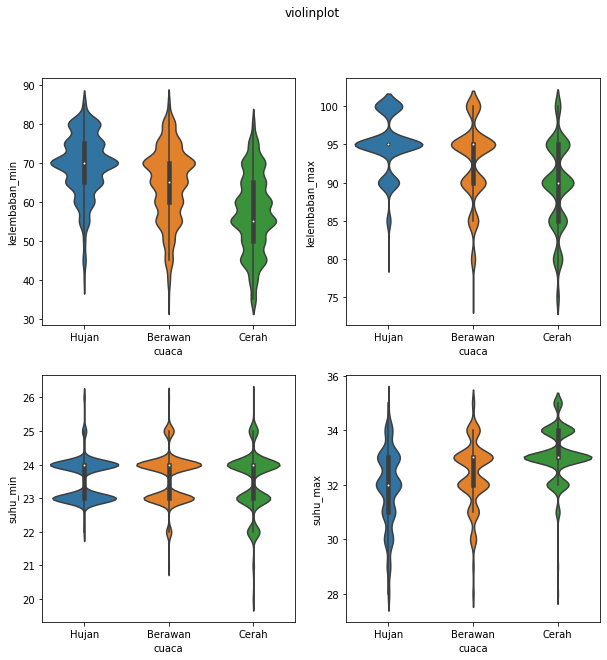

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("violinplot")

# Kelembapan min
sns.violinplot(x="cuaca", y="kelembaban_min", data=df, kind="violin", ax=axes[0, 0])

# Kelembapan max
sns.violinplot(x="cuaca", y="kelembaban_max", data=df, kind="violin", ax=axes[0, 1])

# suhu min
sns.violinplot(x="cuaca", y="suhu_min", data=df, kind="violin", ax=axes[1, 0])

# suhu max
sns.violinplot(x="cuaca", y="suhu_max", data=df, kind="violin", ax=axes[1, 1])

<AxesSubplot:xlabel='cuaca', ylabel='suhu_max'>

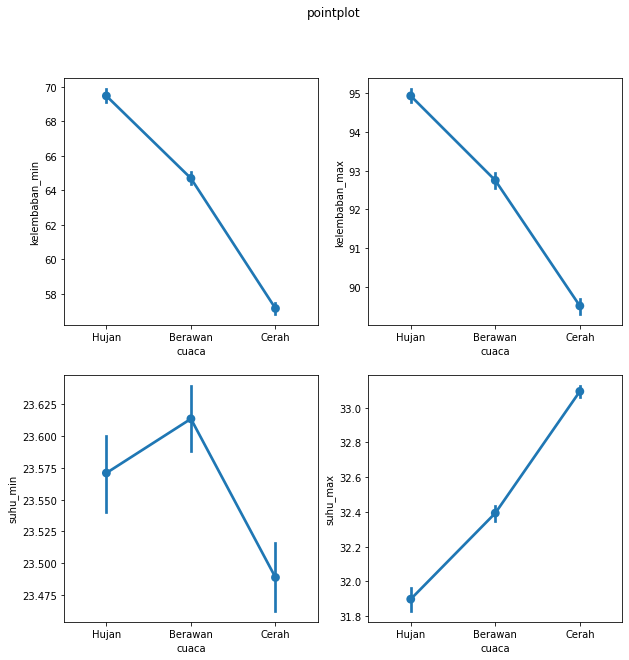

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("pointplot")

# Kelembapan min
sns.pointplot(x="cuaca", y="kelembaban_min", data=df, kind="point", ax=axes[0, 0])

# Kelembapan max
sns.pointplot(x="cuaca", y="kelembaban_max", data=df, kind="point", ax=axes[0, 1])

# suhu min
sns.pointplot(x="cuaca", y="suhu_min", data=df, kind="point", ax=axes[1, 0])

# suhu max
sns.pointplot(x="cuaca", y="suhu_max", data=df, kind="point", ax=axes[1, 1])

<AxesSubplot:xlabel='cuaca', ylabel='count'>

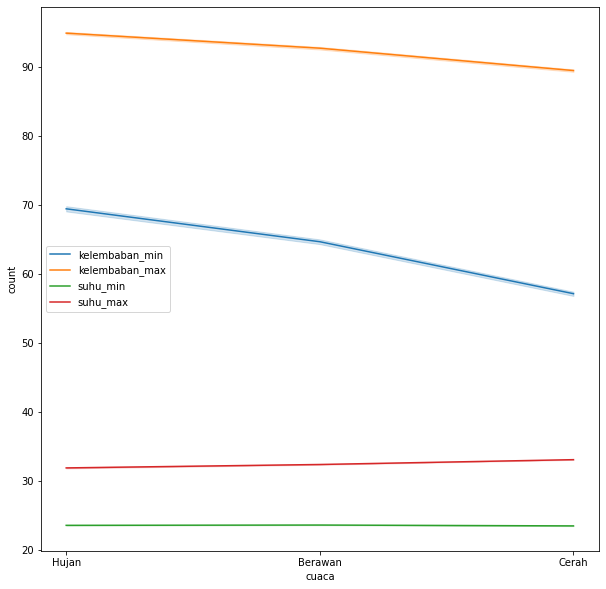

In [28]:
plt.figure(figsize=(10, 10))
sns.lineplot(x="cuaca", y="kelembaban_min", data=df, label="kelembaban_min").set_ylabel("count")
sns.lineplot(x="cuaca", y="kelembaban_max", data=df, label="kelembaban_max")
sns.lineplot(x="cuaca", y="suhu_min", data=df, label="suhu_min")
sns.lineplot(x="cuaca", y="suhu_max", data=df, label="suhu_max")

In [29]:
df.suhu_min.groupby(df.cuaca).describe()

,count,mean,std,min,25%,50%,75%,max
cuaca,,,,,,,,
Berawan,2896.0,23.613605,0.703955,21.0,23.0,24.0,24.0,26.0
Cerah,3796.0,23.488672,0.885621,20.0,23.0,24.0,24.0,26.0
Hujan,1706.0,23.570926,0.602009,22.0,23.0,24.0,24.0,26.0


Text(0.5, 1.0, 'suhu_max')

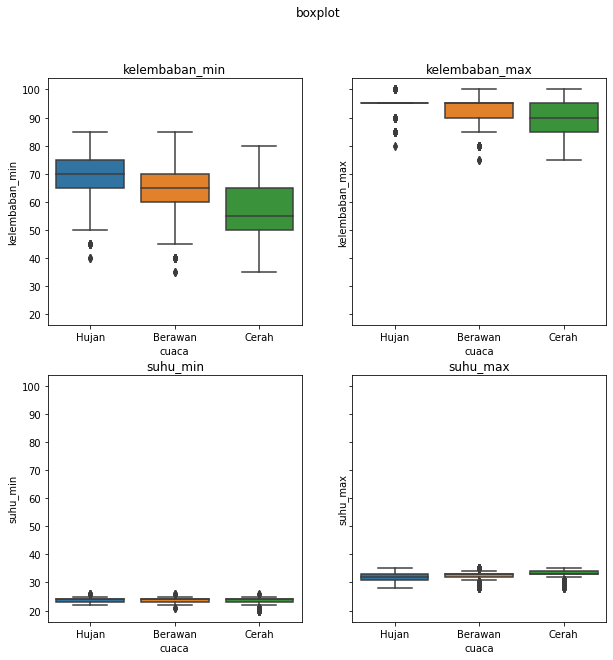

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
fig.suptitle("boxplot")

# Kelembapan min
sns.boxplot(x="cuaca", y="kelembaban_min", data=df, ax=axes[0, 0]).set_title("kelembaban_min")

# Kelembapan max
sns.boxplot(x="cuaca", y="kelembaban_max", data=df, ax=axes[0, 1]).set_title("kelembaban_max")

# suhu min
sns.boxplot(x="cuaca", y="suhu_min", data=df, ax=axes[1, 0]).set_title("suhu_min")

# suhu max
sns.boxplot(x="cuaca", y="suhu_max", data=df, ax=axes[1, 1]).set_title("suhu_max")

In [31]:
numeric = ["kelembaban_min", "kelembaban_max", "suhu_min", "suhu_max"]
cat = ["wilayah", "waktu"]

from scipy import stats
import numpy as np
df = (df[(np.abs(stats.zscore(df[numeric])) < 2).all(axis=1)])
df.shape

(7030, 7)

Text(0.5, 1.0, 'suhu_max')

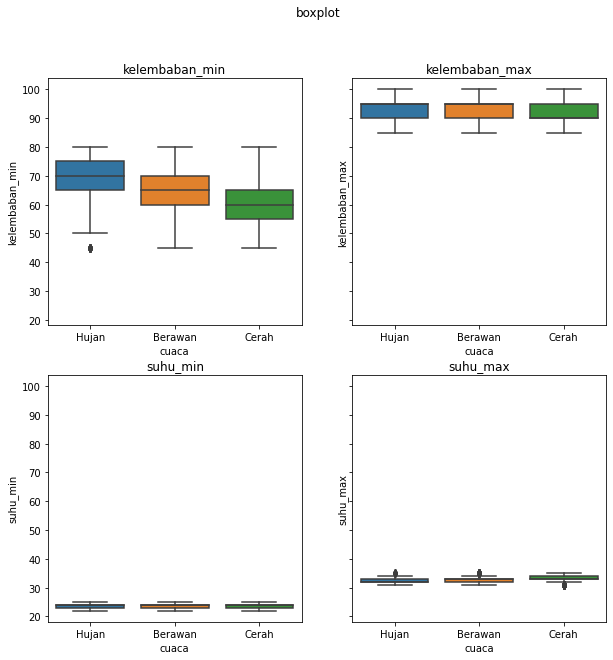

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
fig.suptitle("boxplot")

# Kelembapan min
sns.boxplot(x="cuaca", y="kelembaban_min", data=df, ax=axes[0, 0]).set_title("kelembaban_min")

# Kelembapan max
sns.boxplot(x="cuaca", y="kelembaban_max", data=df, ax=axes[0, 1]).set_title("kelembaban_max")

# suhu min
sns.boxplot(x="cuaca", y="suhu_min", data=df, ax=axes[1, 0]).set_title("suhu_min")

# suhu max
sns.boxplot(x="cuaca", y="suhu_max", data=df, ax=axes[1, 1]).set_title("suhu_max")

<AxesSubplot:xlabel='cuaca', ylabel='suhu_max'>

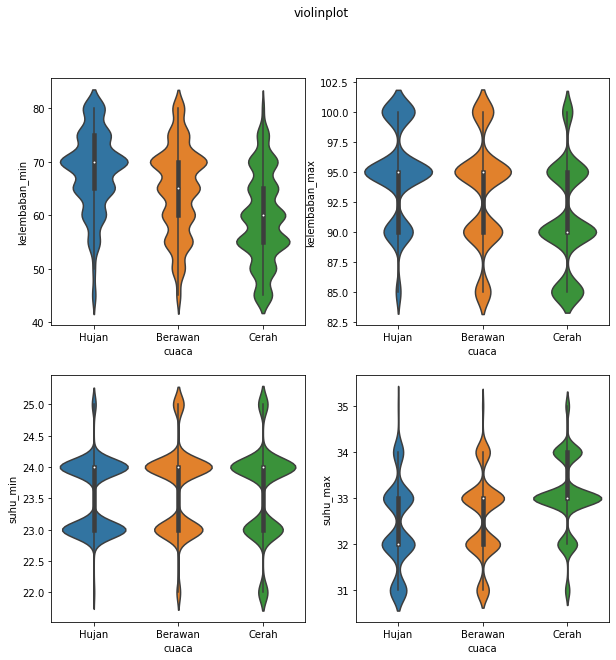

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("violinplot")

# Kelembapan min
sns.violinplot(x="cuaca", y="kelembaban_min", data=df, kind="violin", ax=axes[0, 0])

# Kelembapan max
sns.violinplot(x="cuaca", y="kelembaban_max", data=df, kind="violin", ax=axes[0, 1])

# suhu min
sns.violinplot(x="cuaca", y="suhu_min", data=df, kind="violin", ax=axes[1, 0])

# suhu max
sns.violinplot(x="cuaca", y="suhu_max", data=df, kind="violin", ax=axes[1, 1])

<AxesSubplot:xlabel='cuaca', ylabel='suhu_max'>

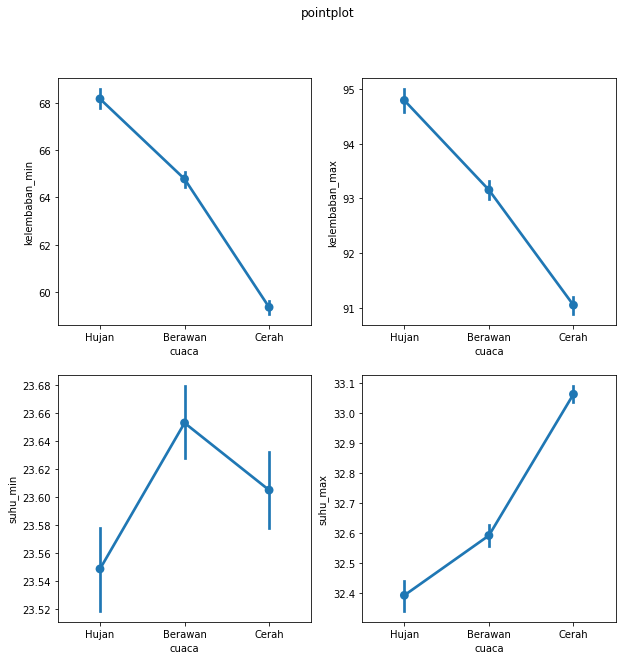

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("pointplot")

# Kelembapan min
sns.pointplot(x="cuaca", y="kelembaban_min", data=df, kind="point", ax=axes[0, 0])

# Kelembapan max
sns.pointplot(x="cuaca", y="kelembaban_max", data=df, kind="point", ax=axes[0, 1])

# suhu min
sns.pointplot(x="cuaca", y="suhu_min", data=df, kind="point", ax=axes[1, 0])

# suhu max
sns.pointplot(x="cuaca", y="suhu_max", data=df, kind="point", ax=axes[1, 1])

<AxesSubplot:xlabel='cuaca', ylabel='count'>

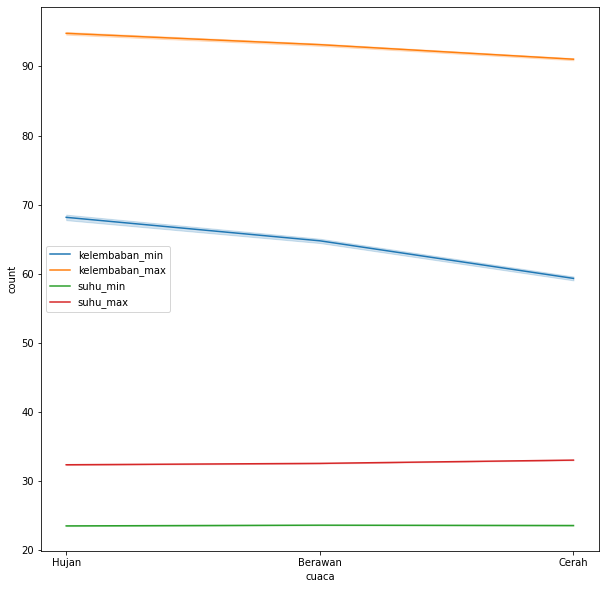

In [35]:
plt.figure(figsize=(10, 10))
sns.lineplot(x="cuaca", y="kelembaban_min", data=df, label="kelembaban_min").set_ylabel("count")
sns.lineplot(x="cuaca", y="kelembaban_max", data=df, label="kelembaban_max")
sns.lineplot(x="cuaca", y="suhu_min", data=df, label="suhu_min")
sns.lineplot(x="cuaca", y="suhu_max", data=df, label="suhu_max")

c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

<AxesSubplot:xlabel='suhu_max', ylabel='Density'>

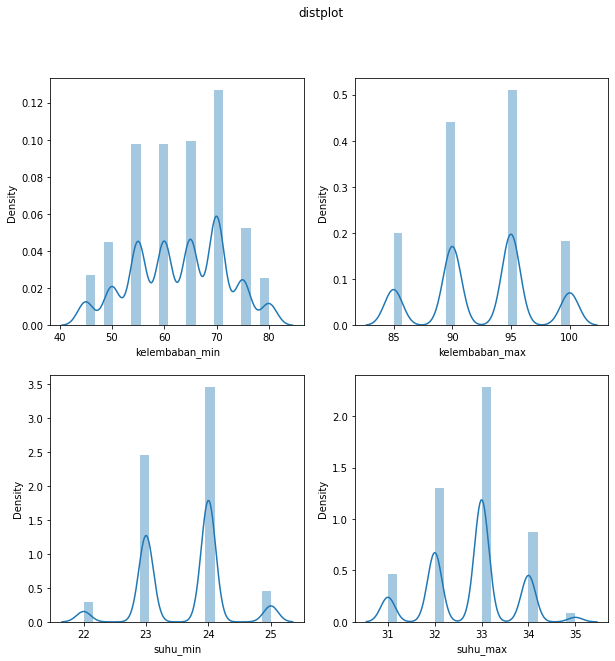

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("distplot")


sns.distplot(df.kelembaban_min, bins=20, ax=axes[0, 0])
sns.distplot(df.kelembaban_max, bins=20, ax=axes[0, 1])
sns.distplot(df.suhu_min, bins=20, ax=axes[1, 0])
sns.distplot(df.suhu_max, bins=20, ax=axes[1, 1])

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

ss = StandardScaler()
pwt = PowerTransformer(method="yeo-johnson")

df[numeric] = ss.fit_transform(df[numeric])
df[numeric] = pwt.fit_transform(df[numeric])

c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

<AxesSubplot:xlabel='suhu_max', ylabel='Density'>

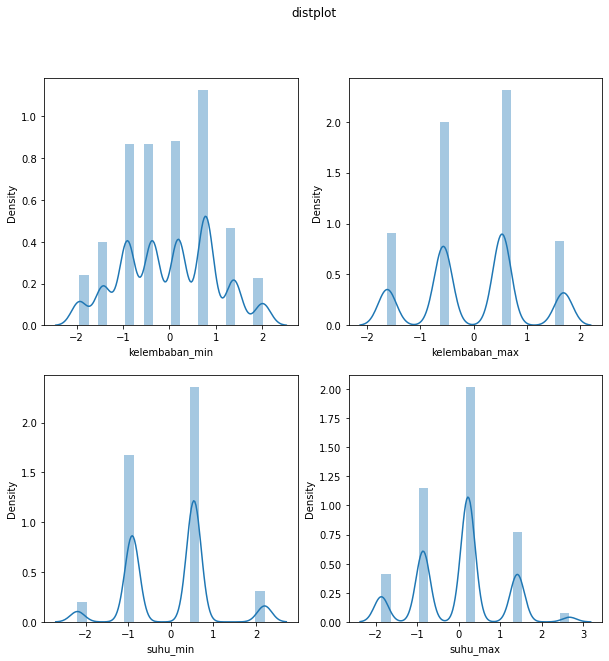

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("distplot")


sns.distplot(df.kelembaban_min, bins=20, ax=axes[0, 0])
sns.distplot(df.kelembaban_max, bins=20, ax=axes[0, 1])
sns.distplot(df.suhu_min, bins=20, ax=axes[1, 0])
sns.distplot(df.suhu_max, bins=20, ax=axes[1, 1])

In [39]:
df.head()

,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,Hujan,0.779068,-0.571447,0.542558,-0.856524
1,Kepulauan Seribu,Pagi,Hujan,0.779068,-0.571447,0.542558,-0.856524
2,Kepulauan Seribu,Malam,Hujan,0.779068,-0.571447,0.542558,-0.856524
3,Kepulauan Seribu,Dini Hari,Hujan,0.779068,-0.571447,0.542558,-0.856524
4,Jakarta Utara,Siang,Hujan,0.779068,-0.571447,0.542558,-0.856524


In [40]:
from jcopml.plot import plot_correlation_ratio, plot_association_matrix

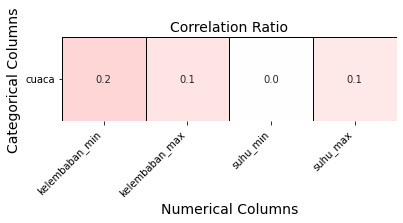

In [41]:
plot_correlation_ratio(df, ['cuaca'], numeric)

In [42]:
plot_association_matrix(df, 'cuaca', categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

In [43]:
df.head()

,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,Hujan,0.779068,-0.571447,0.542558,-0.856524
1,Kepulauan Seribu,Pagi,Hujan,0.779068,-0.571447,0.542558,-0.856524
2,Kepulauan Seribu,Malam,Hujan,0.779068,-0.571447,0.542558,-0.856524
3,Kepulauan Seribu,Dini Hari,Hujan,0.779068,-0.571447,0.542558,-0.856524
4,Jakarta Utara,Siang,Hujan,0.779068,-0.571447,0.542558,-0.856524


In [44]:
df.dtypes

wilayah            object
waktu              object
cuaca              object
kelembaban_min    float64
kelembaban_max    float64
suhu_min          float64
suhu_max          float64
dtype: object

In [45]:
mapping_cuaca = {
    'Cerah': 0,
    'Hujan': 1,
    'Berawan': 2
}

df['cuaca'] = df['cuaca'].map(mapping_cuaca)

df.head()

,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,1,0.779068,-0.571447,0.542558,-0.856524
1,Kepulauan Seribu,Pagi,1,0.779068,-0.571447,0.542558,-0.856524
2,Kepulauan Seribu,Malam,1,0.779068,-0.571447,0.542558,-0.856524
3,Kepulauan Seribu,Dini Hari,1,0.779068,-0.571447,0.542558,-0.856524
4,Jakarta Utara,Siang,1,0.779068,-0.571447,0.542558,-0.856524


In [46]:
df.isna().sum()

wilayah           0
waktu             0
cuaca             0
kelembaban_min    0
kelembaban_max    0
suhu_min          0
suhu_max          0
dtype: int64

In [47]:
df.cuaca.head()

0    1
1    1
2    1
3    1
4    1
Name: cuaca, dtype: int64

In [48]:
X = df.drop(columns=["cuaca"])
y = df["cuaca"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5624, 6), (1406, 6), (5624,), (1406,))

In [52]:
X_train = pd.get_dummies(X_train, columns=["waktu", "wilayah"])
X_test = pd.get_dummies(X_test, columns=["waktu", "wilayah"])

In [53]:
from jcopml.tuning.space import Integer, Real

parameters = {
    'max_depth': Integer(low=1, high=10),
    'learning_rate': Real(low=-2, high=0, prior='log-uniform'),
    'n_estimators': Integer(low=100, high=200),
    'subsample': Real(low=0.3, high=0.8, prior='uniform'),
    'gamma': Integer(low=1, high=10),
    'colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
    'reg_lambda': Real(low=-3, high=1, prior='log-uniform')
}

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

XGB = XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False)

model = RandomizedSearchCV(XGB, parameters, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[13:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.9174392973699884, 'gamma': 3, 'learning_rate': 0.22983221528155043, 'max_depth': 5, 'n_estimators': 143, 'reg_alpha': 0.061820520641258085, 'reg_lambda': 0.16276924772060908, 'subsample': 0.5963483619396968}
[[487  31 115]
 [ 46 147  82]
 [153  49 296]] 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2530
           1       0.69      0.60      0.64      1100
           2       0.62      0.62      0.62      1994

    accuracy                           0.69      5624
   macro avg       0.68      0.66      0.67      5624
weighted avg       0.6